## Comunidades!
¿Cómo podemos reconocer (con un espíritu no-supervisado) **grupos de nodos densamente conectados en un grafo $G$, que al mismo tiempo establecen pocas conexiones con otros grupos?** ¿Qué **medidas o conceptos** podemos utilizar? ¿Qué **significados** tienen estas medidas en un contexto en particular? Es habitual en Ciencia de Redes establecer una sinergia entre dos maneras de mirar un mismo problema:

- la **búsqueda de medidas en Teoría de Grafos** que nos permitan decir cosas sobre una red (que representa algo del mundo).
- la **re-interpretación de las medidas utilizadas**, y cómo estas interpretaciones nos podrían servir para otros contextos. 

En este **notebook** nos centramos (entre otros conceptos) en la **modularidad** de una red. En términos formales, la [modularidad](https://www.pnas.org/content/103/23/8577) se define formalmente como

$$Q=\frac{1}{2m}\sum_{ij}[A_{ij}-\frac{k_ik_j}{2m}]\delta(c_i,c_j)$$

donde $\frac{k_ik_j}{2m}$ es el número esperado de aristas, si estas son elegidas al azar. 

### 1. Preliminares: grafos de similaridad lingüística :)

Como hemos visto en clases anteriores, consideremos datos formados por un conjunto de puntos $x_1,...,x_n$. Sobre este conjunto, definimos **alguna noción de similaridad (o distancia)** entre pares $x_i$ y $x_j$ como $s_{ij}$. Una forma útil de representar esta situación es a través de un **grafo de similaridad (distancia)** $G=(V,E)$, donde el conjunto $V$ representa el conjunto de puntos, y $E$ define distancias entre puntos. Existen diversas opciones para definir $E$:

- **$\epsilon$-graph:** unimos dos puntos $x_i$ y $x_j$ si $s_{ij}<\epsilon$.  
- **$k$-nearest graph:** cada punto $x_i$ se une a los $k$ puntos más cercanos. 
- **complete graph:** cada par de puntos $x_i$ y $x_j$ se une con una arista con un peso igual a $s_{ij}$.

**Pensemos (nuevamente) en lenguas y datos.** Existen muchas bases de datos lingüísticas, por ejemplo [SAILS](https://sails.clld.org/) o [WALS](https://wals.info/), en donde cada lengua -digamos $L$- se representa por un conjunto de rasgos $r_1^L,...,r_m^L$. Cada rasgo $r_i^L$, además, tiene un valor (en general, numérico). Estos rasgos han sido registrados por expertas y expertos. 

En términos más precisos, **$L$ se representa por un vector ordenado de números:** ¿Cómo podemos **comparar** lenguas y responder, por ejemplo, las maneras en que las lenguas se agrupan en **familias**? ¿En cuánto se parece el **mapundungun** con el **quechua**? En este taller, nos proponemos definir un **grafo de similaridad $G=(V,E)$**, donde **$V$ es un conjunto de lenguas** y **$E$ es un conjunto de aristas que registran similaridades entre pares de lenguas.** 

### 2. Datos
xxx

In [4]:
## familias lingüísticas
import pickle

id_family=pickle.load(open('id_family.p','rb'))

In [5]:
### leemos los datos

import networkx as nx

graphs=pickle.load(open('graphs.p','rb'))

In [6]:
graphs

{30: {3: <networkx.classes.graph.Graph at 0x7f6659f745f8>,
  4: <networkx.classes.graph.Graph at 0x7f6636f9b9e8>,
  5: <networkx.classes.graph.Graph at 0x7f6636fa68d0>,
  6: <networkx.classes.graph.Graph at 0x7f6636fa6908>,
  7: <networkx.classes.graph.Graph at 0x7f6636fa6940>},
 40: {3: <networkx.classes.graph.Graph at 0x7f6636fa69e8>,
  4: <networkx.classes.graph.Graph at 0x7f6636fa69b0>,
  5: <networkx.classes.graph.Graph at 0x7f6636fa6978>,
  6: <networkx.classes.graph.Graph at 0x7f6636fa6a20>,
  7: <networkx.classes.graph.Graph at 0x7f6636fa6a58>},
 50: {3: <networkx.classes.graph.Graph at 0x7f6636fa6a90>,
  4: <networkx.classes.graph.Graph at 0x7f6636fa6ac8>,
  5: <networkx.classes.graph.Graph at 0x7f6636fa6b00>,
  6: <networkx.classes.graph.Graph at 0x7f6636fa6b38>,
  7: <networkx.classes.graph.Graph at 0x7f6636fa6b70>},
 60: {3: <networkx.classes.graph.Graph at 0x7f6636fa6ba8>,
  4: <networkx.classes.graph.Graph at 0x7f6636fa6be0>,
  5: <networkx.classes.graph.Graph at 0x7f6636

In [7]:
!pip install pydot

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9291 sha256=8e5444f71442e5ee61dff0d94498d3cc815217d7eedd5ffe9f8ca785f5657bde
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d5/54/b7/9a703ffb0734ba1cdce4b827b2f07ed05e3108d76b32b9f510
Successfully built python-louvain
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
import community as community_louvain

In [84]:
## visualicemos los grafos!

import matplotlib.pyplot as plt

def plotG(num_rasgos):
    fig, ax = plt.subplots(dpi=1080)
    G=graphs[num_rasgos][knn]
    
    #partition = community_louvain.best_partition(G,weight='none',partition={key:id_family[key] for key in G.nodes()})

    pos = nx.nx_pydot.graphviz_layout(G)#nx.kamada_kawai_layout(G)
    ## 
    nodesA = [node for node in G.nodes() if id_family[node]=='araw1281']
    nodesM = [node for node in G.nodes() if id_family[node]=='maya1287']
    nodesQ = [node for node in G.nodes() if id_family[node]=='quec1387']
    nodesP = [node for node in G.nodes() if id_family[node]=='pano1259']
    nodesO = [node for node in G.nodes() if id_family[node]=='otom1299']
    nodesT = [node for node in G.nodes() if id_family[node]=='tupi1275']
    nodesN = [node for node in G.nodes() if id_family[node]=='nucl1710']
    nodesC = [node for node in G.nodes() if id_family[node]=='cari1283']
    nodesU = [node for node in G.nodes() if id_family[node]=='utoa1244']
    nodesCh= [node for node in G.nodes() if id_family[node]=='chib1249']
    nodesB= [node for node in G.nodes() if id_family[node]=='barb1265']
    nodesAy= [node for node in G.nodes() if id_family[node]=='ayma1253']
    nodesAr= [node for node in G.nodes() if id_family[node]=='arau1255']
    nodesCho= [node for node in G.nodes() if id_family[node]=='chon1288']
    nodesMa= [node for node in G.nodes() if id_family[node]=='mata1289']
    nodesGu= [node for node in G.nodes() if id_family[node]=='guai1249']
    nodesZa= [node for node in G.nodes() if id_family[node]=='zamu1243']

    #nodesnonA = [node for node in G.nodes() if id_family[node] not in ['araw1281','maya1287','quec1387','pano1259','otom1299','tupi1275','nucl1710','cari1283','utoa1244']]
    
    nx.draw_networkx_nodes(G, pos, nodelist=nodesA, node_size = 40, node_color='orange',node_shape='H',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='araw1281') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesM, node_size = 40, node_color='m',node_shape='X', markeredgecolor='k',alpha=0.95,fillstyle='full',linewidths=0.1,label='maya1287') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesQ, node_size = 40, node_color='b',node_shape='o',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='quec1387') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesP, node_size = 40, node_color='r',node_shape='s',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='pano1259') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesO, node_size = 40, node_color='cyan',node_shape='D',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='otom1299') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesT, node_size = 40, node_color='yellow',node_shape='*',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='tupi1275') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesN, node_size = 40, node_color='green',node_shape='^',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='nucl1710') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesC, node_size = 40, node_color='olive',node_shape='v',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='cari1283') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesU, node_size = 40, node_color='lime',node_shape='p',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='utoa1244') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesCh, node_size = 40, node_color='crimson',node_shape='<',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='chib1249') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesB, node_size = 40, node_color='chocolate',node_shape='>',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='barb1265') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesAy, node_size = 40, node_color='slategrey',node_shape='d',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='ayma1253') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesAr, node_size = 40, node_color='fuchsia',node_shape='8',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='arau1255') 
    ##
    nx.draw_networkx_nodes(G, pos, nodelist=nodesCho, node_size = 40, node_color='palegreen',node_shape='h',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='chon1288') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesMa, node_size = 40, node_color='steelblue',node_shape='p',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='mata1289') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesGu, node_size = 40, node_color='salmon',node_shape='*',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='guai1249') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesZa, node_size = 40, node_color='gold',node_shape='s',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='zamu1243') 

    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.15,edge_color='lightblue')
    #labels=partition
    #nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=4,font_color='k',font_family='monospace')
    plt.title(str(num_rasgos)+' features'+', '+str(len(G))+' languages and '+str(knn)+' nearest neighbors',fontsize=10)
    plt.legend(loc='best',fontsize=5)
    plt.axis('off')
    plt.savefig('GRAPHS/graph_knn_'+str(num_rasgos)+'_'+str(knn)+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

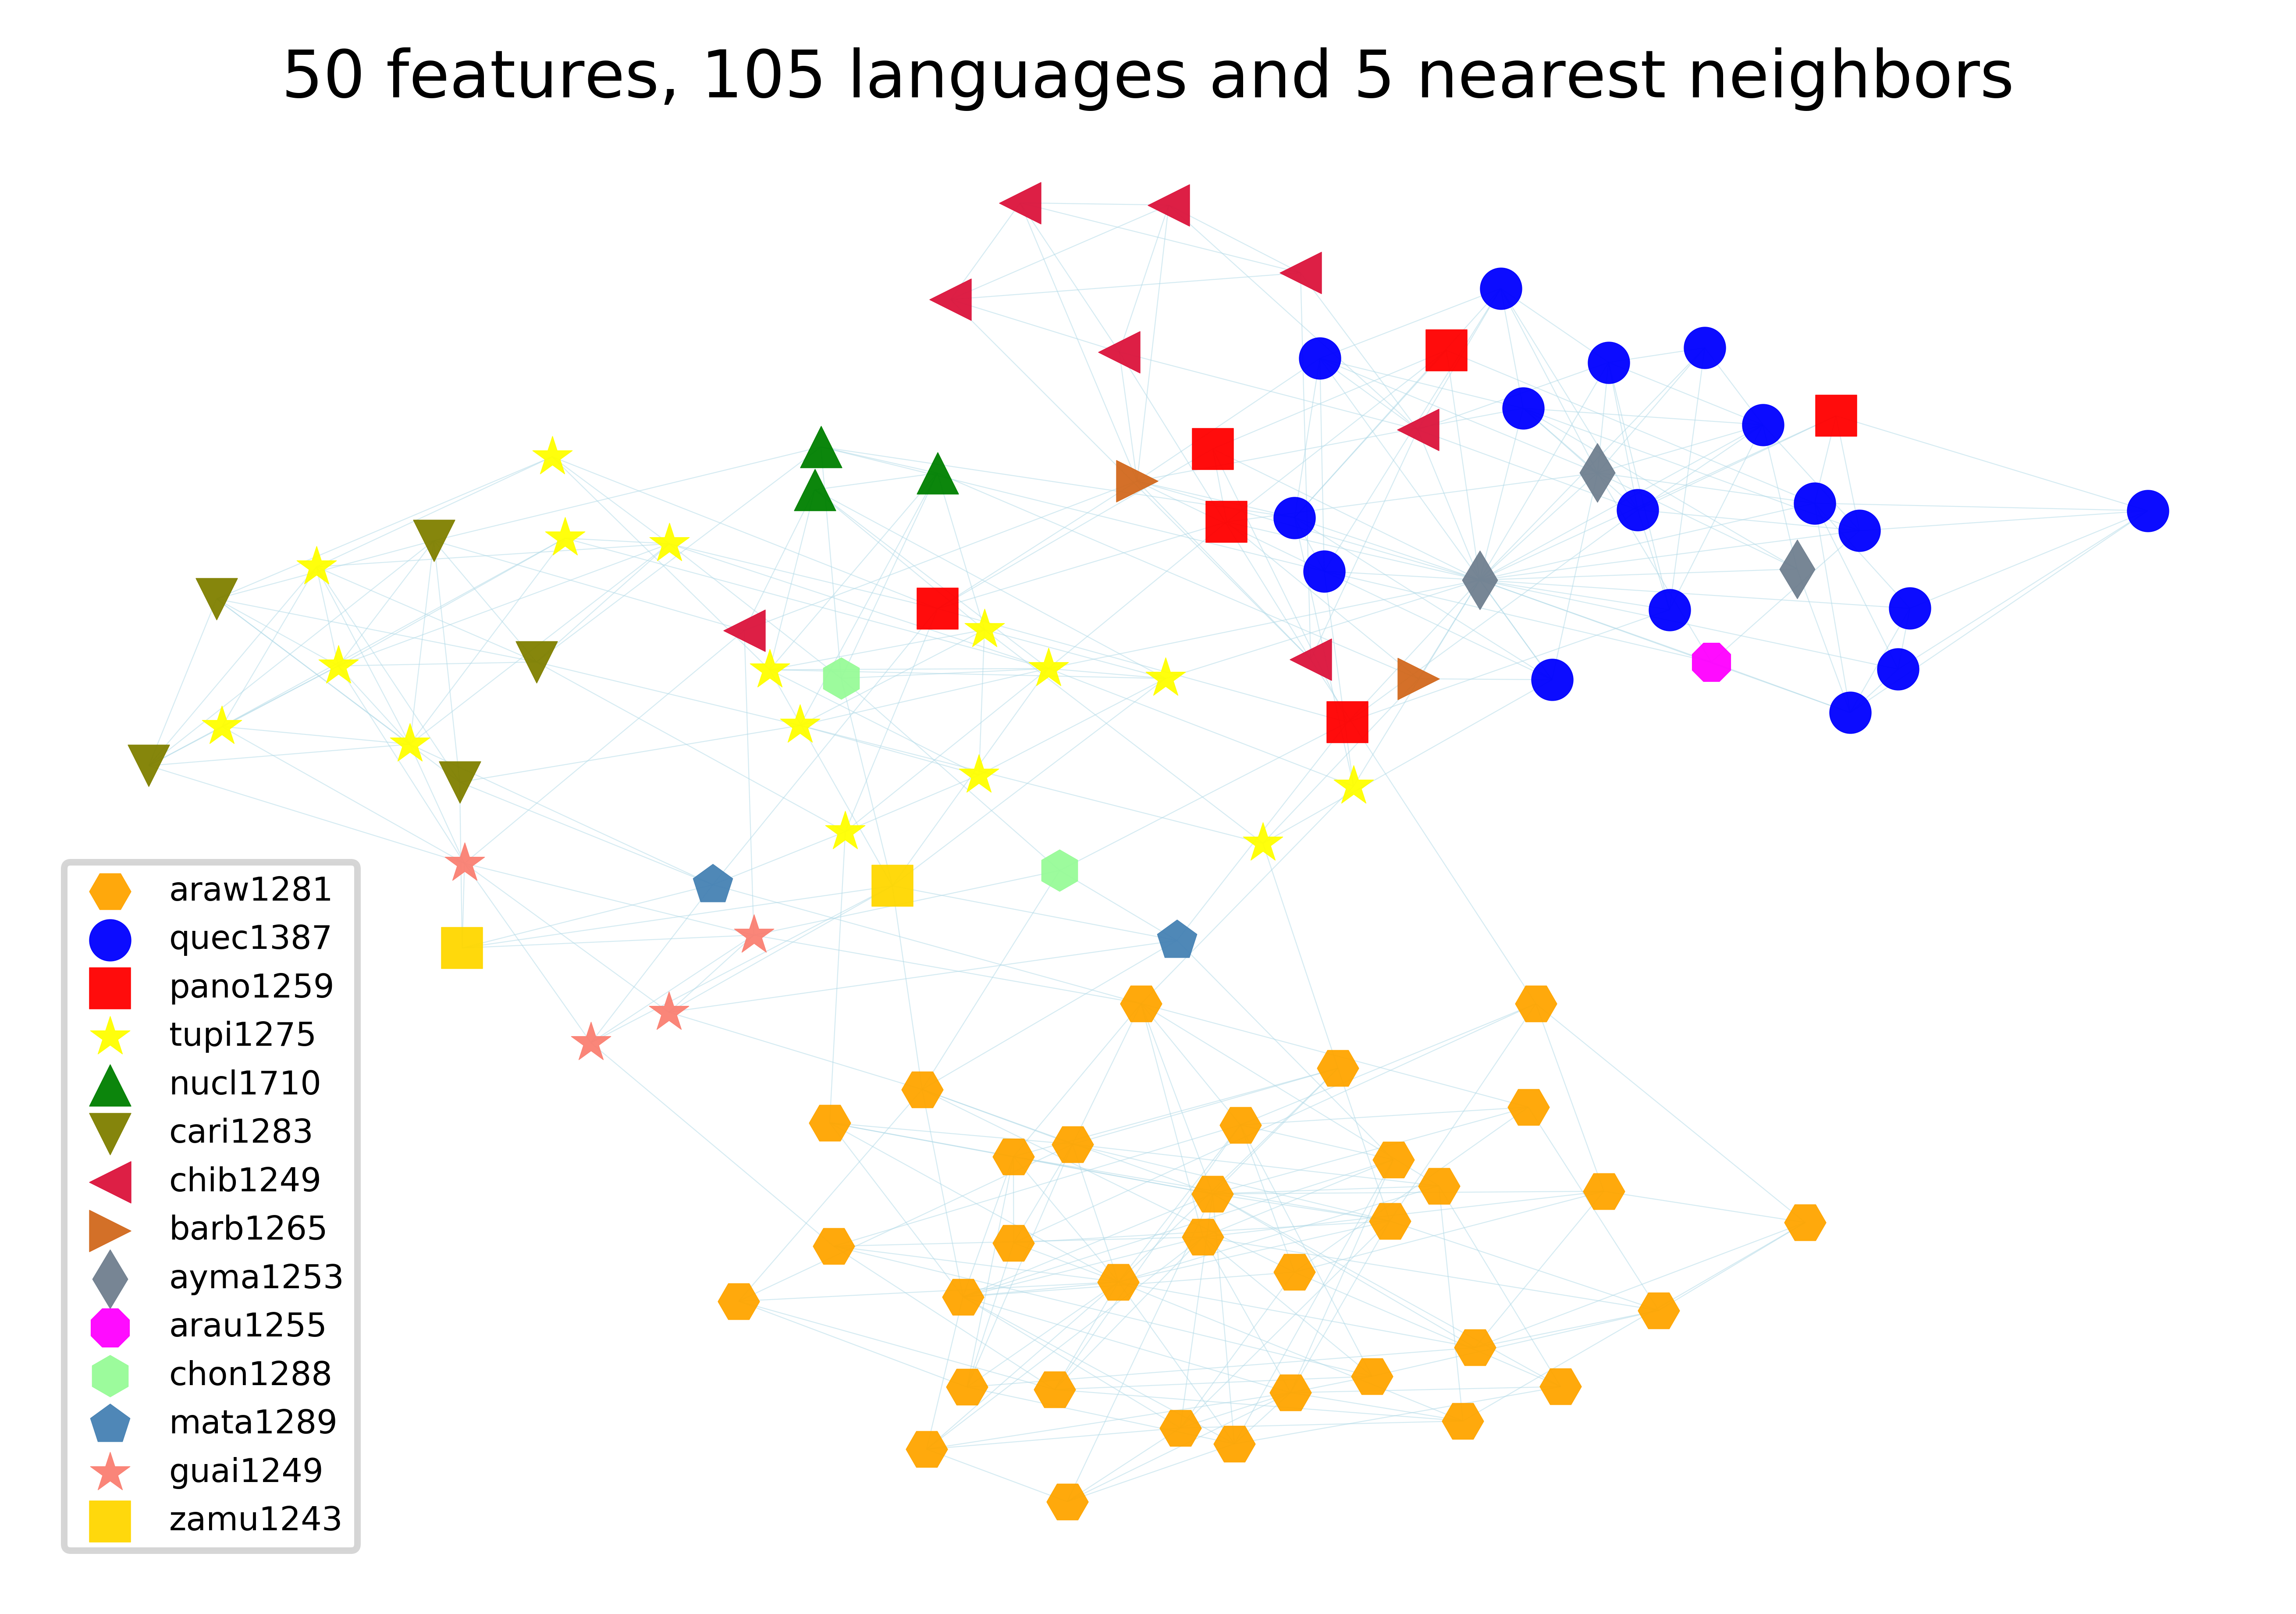

In [86]:
plotG(50,5)

### 3. Representaciones de baja dimensión

Los grafos pueden parecer una **maraña de alta dimensionalidad**. En este sentido, siempre es útil, en una primera aproximación, intentar borrar ciertos nodos o arista de poca importancia. Otra manera de solucionar esto es **representar los nodos de un grafo como vectores.** Esto permite, como sabemos, aplicar técnicas de machine learning con el fin de **extraer información de los grafos.** 

#### **clustering spectral**

No debería sorprendernos que la matriz de adyacencia de un grafo permite identificar comunidades. 

In [87]:
G=graphs[50][5]

In [89]:
import numpy.linalg as la
import scipy.cluster.vq as vq
import numpy as np

A = nx.adjacency_matrix(G)#,weight='weight')
D = np.diag(np.ravel(np.sum(A,axis=1)))
L = D - A
l, U = la.eigh(L)
f = U[:,1]
k = 3
means, labels = vq.kmeans2(U[:,1:k], k)
labels_nodes=dict(zip(G.nodes(),labels))

In [96]:
def plot_spec(G):
    fig, ax = plt.subplots(dpi=1080)
    
    #partition = community_louvain.best_partition(G,weight='none',partition={key:id_family[key] for key in G.nodes()})

    pos = nx.nx_pydot.graphviz_layout(G)#nx.kamada_kawai_layout(G)
    ## 
    nodesA = [node for node in G.nodes() if id_family[node]=='araw1281']
    nodesM = [node for node in G.nodes() if id_family[node]=='maya1287']
    nodesQ = [node for node in G.nodes() if id_family[node]=='quec1387']
    nodesP = [node for node in G.nodes() if id_family[node]=='pano1259']
    nodesO = [node for node in G.nodes() if id_family[node]=='otom1299']
    nodesT = [node for node in G.nodes() if id_family[node]=='tupi1275']
    nodesN = [node for node in G.nodes() if id_family[node]=='nucl1710']
    nodesC = [node for node in G.nodes() if id_family[node]=='cari1283']
    nodesU = [node for node in G.nodes() if id_family[node]=='utoa1244']
    nodesCh= [node for node in G.nodes() if id_family[node]=='chib1249']
    nodesB= [node for node in G.nodes() if id_family[node]=='barb1265']
    nodesAy= [node for node in G.nodes() if id_family[node]=='ayma1253']
    nodesAr= [node for node in G.nodes() if id_family[node]=='arau1255']
    nodesCho= [node for node in G.nodes() if id_family[node]=='chon1288']
    nodesMa= [node for node in G.nodes() if id_family[node]=='mata1289']
    nodesGu= [node for node in G.nodes() if id_family[node]=='guai1249']
    nodesZa= [node for node in G.nodes() if id_family[node]=='zamu1243']

    #nodesnonA = [node for node in G.nodes() if id_family[node] not in ['araw1281','maya1287','quec1387','pano1259','otom1299','tupi1275','nucl1710','cari1283','utoa1244']]
    
    nx.draw_networkx_nodes(G, pos, nodelist=nodesA, node_size = 40, node_color='orange',node_shape='H',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='araw1281') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesM, node_size = 40, node_color='m',node_shape='X', markeredgecolor='k',alpha=0.95,fillstyle='full',linewidths=0.1,label='maya1287') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesQ, node_size = 40, node_color='b',node_shape='o',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='quec1387') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesP, node_size = 40, node_color='r',node_shape='s',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='pano1259') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesO, node_size = 40, node_color='cyan',node_shape='D',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='otom1299') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesT, node_size = 40, node_color='yellow',node_shape='*',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='tupi1275') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesN, node_size = 40, node_color='green',node_shape='^',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='nucl1710') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesC, node_size = 40, node_color='olive',node_shape='v',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='cari1283') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesU, node_size = 40, node_color='lime',node_shape='p',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='utoa1244') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesCh, node_size = 40, node_color='crimson',node_shape='<',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='chib1249') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesB, node_size = 40, node_color='chocolate',node_shape='>',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='barb1265') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesAy, node_size = 40, node_color='slategrey',node_shape='d',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='ayma1253') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesAr, node_size = 40, node_color='fuchsia',node_shape='8',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='arau1255') 
    ##
    nx.draw_networkx_nodes(G, pos, nodelist=nodesCho, node_size = 40, node_color='palegreen',node_shape='h',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='chon1288') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesMa, node_size = 40, node_color='steelblue',node_shape='p',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='mata1289') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesGu, node_size = 40, node_color='salmon',node_shape='*',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='guai1249') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesZa, node_size = 40, node_color='gold',node_shape='s',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='zamu1243') 

    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.15,edge_color='lightblue')
    labels=labels_nodes
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=4,font_color='k',font_family='monospace')
    plt.title(r'spectral representation $+$ kmeans',fontsize=10)
    plt.legend(loc='best',fontsize=5)
    plt.axis('off')
    plt.savefig('GRAPHS/graph_spectral.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

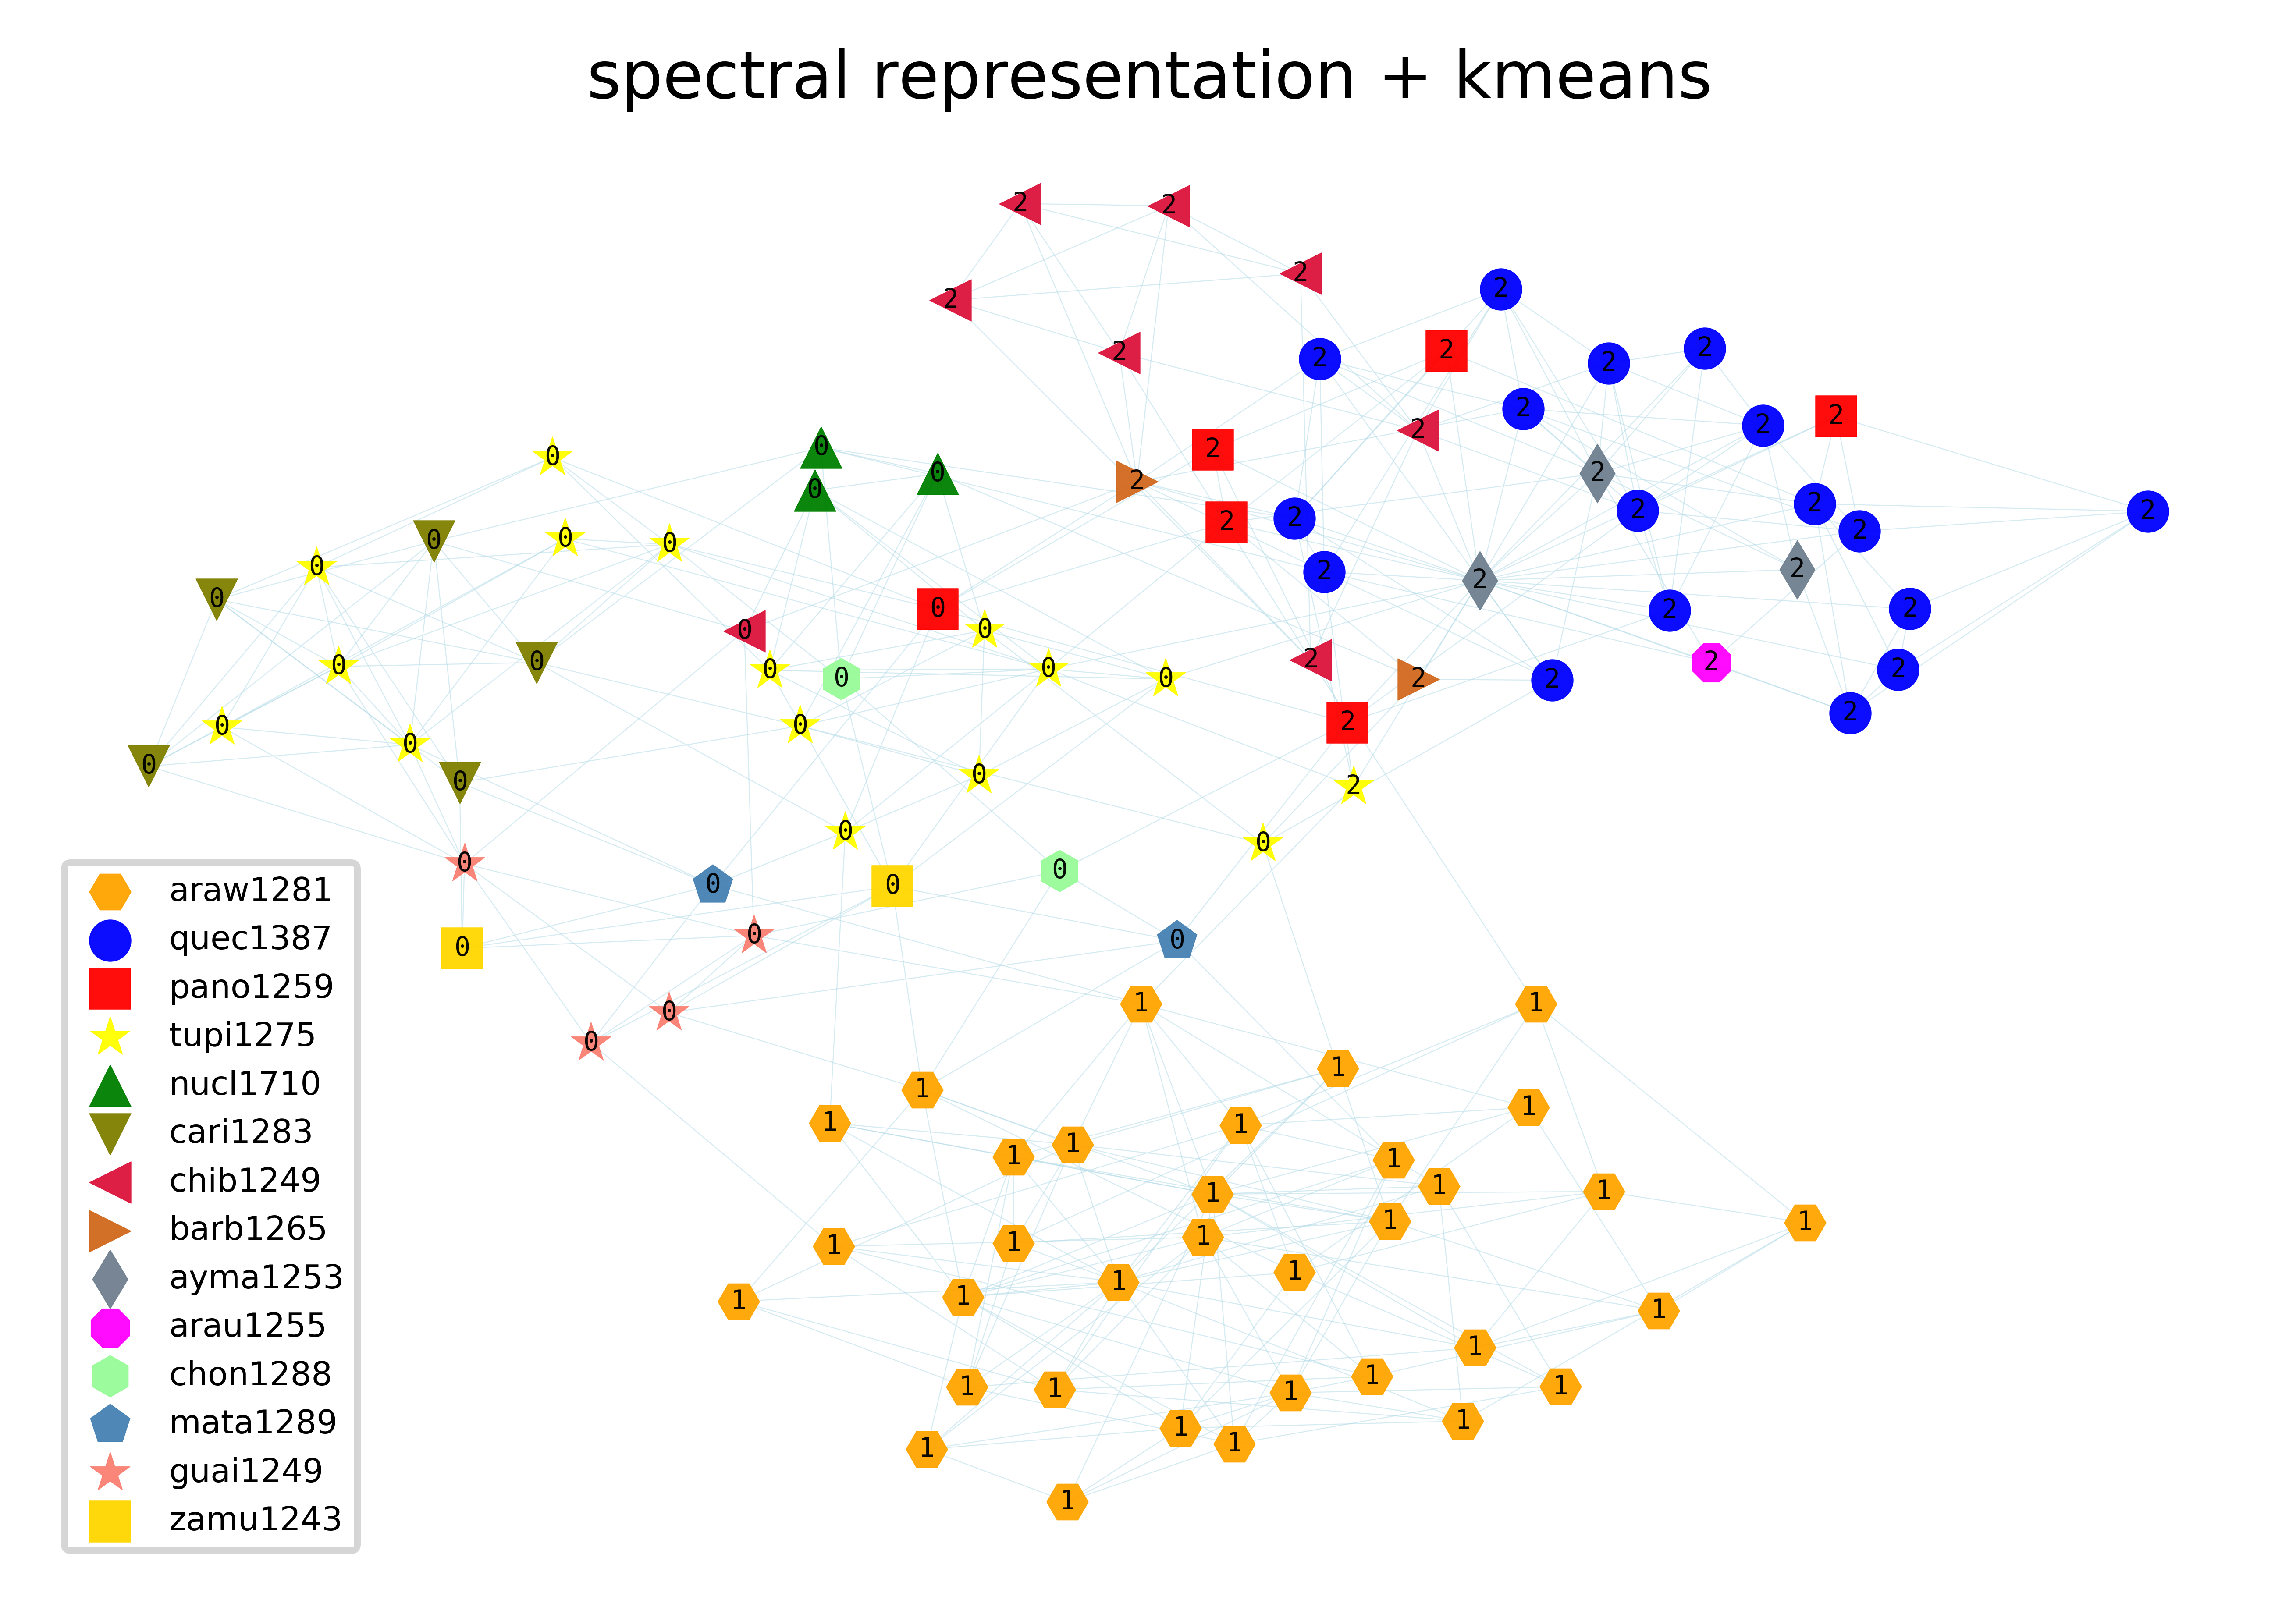

In [97]:
plot_spec(G)

#### **node2vec!**

In [68]:
!pip install node2vec

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [69]:
from node2vec import Node2Vec

In [70]:
node2vec = Node2Vec(G, dimensions=128, walk_length=80, num_walks=200, workers=4)

Computing transition probabilities: 100%|██████████| 105/105 [00:00<00:00, 2514.50it/s]


In [71]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [72]:
features_pred = {language:model.wv.get_vector(language) for language in G.nodes()}

In [73]:
## proyectamos los datos de languages en 2D

## en X guardamos todas las listas de rasgos

X=[]
for language in features_pred.keys():
    X+=[list(features_pred[language])]

In [74]:
## usamos TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

from sklearn.manifold import TSNE

X = TSNE(n_components=2,perplexity=20,init='pca',n_iter=2000,random_state=0).fit_transform(X)

In [75]:
from sklearn import metrics
from sklearn.cluster import KMeans
S_NN = {}
for k in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    S_NN[k]=metrics.silhouette_score(X, labels, metric='euclidean')

In [76]:
S_NN

{2: 0.60347694,
 3: 0.6937477,
 4: 0.65049666,
 5: 0.60639954,
 6: 0.59423137,
 7: 0.49581954,
 8: 0.46898967,
 9: 0.47541144,
 10: 0.46969935}

In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

In [78]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

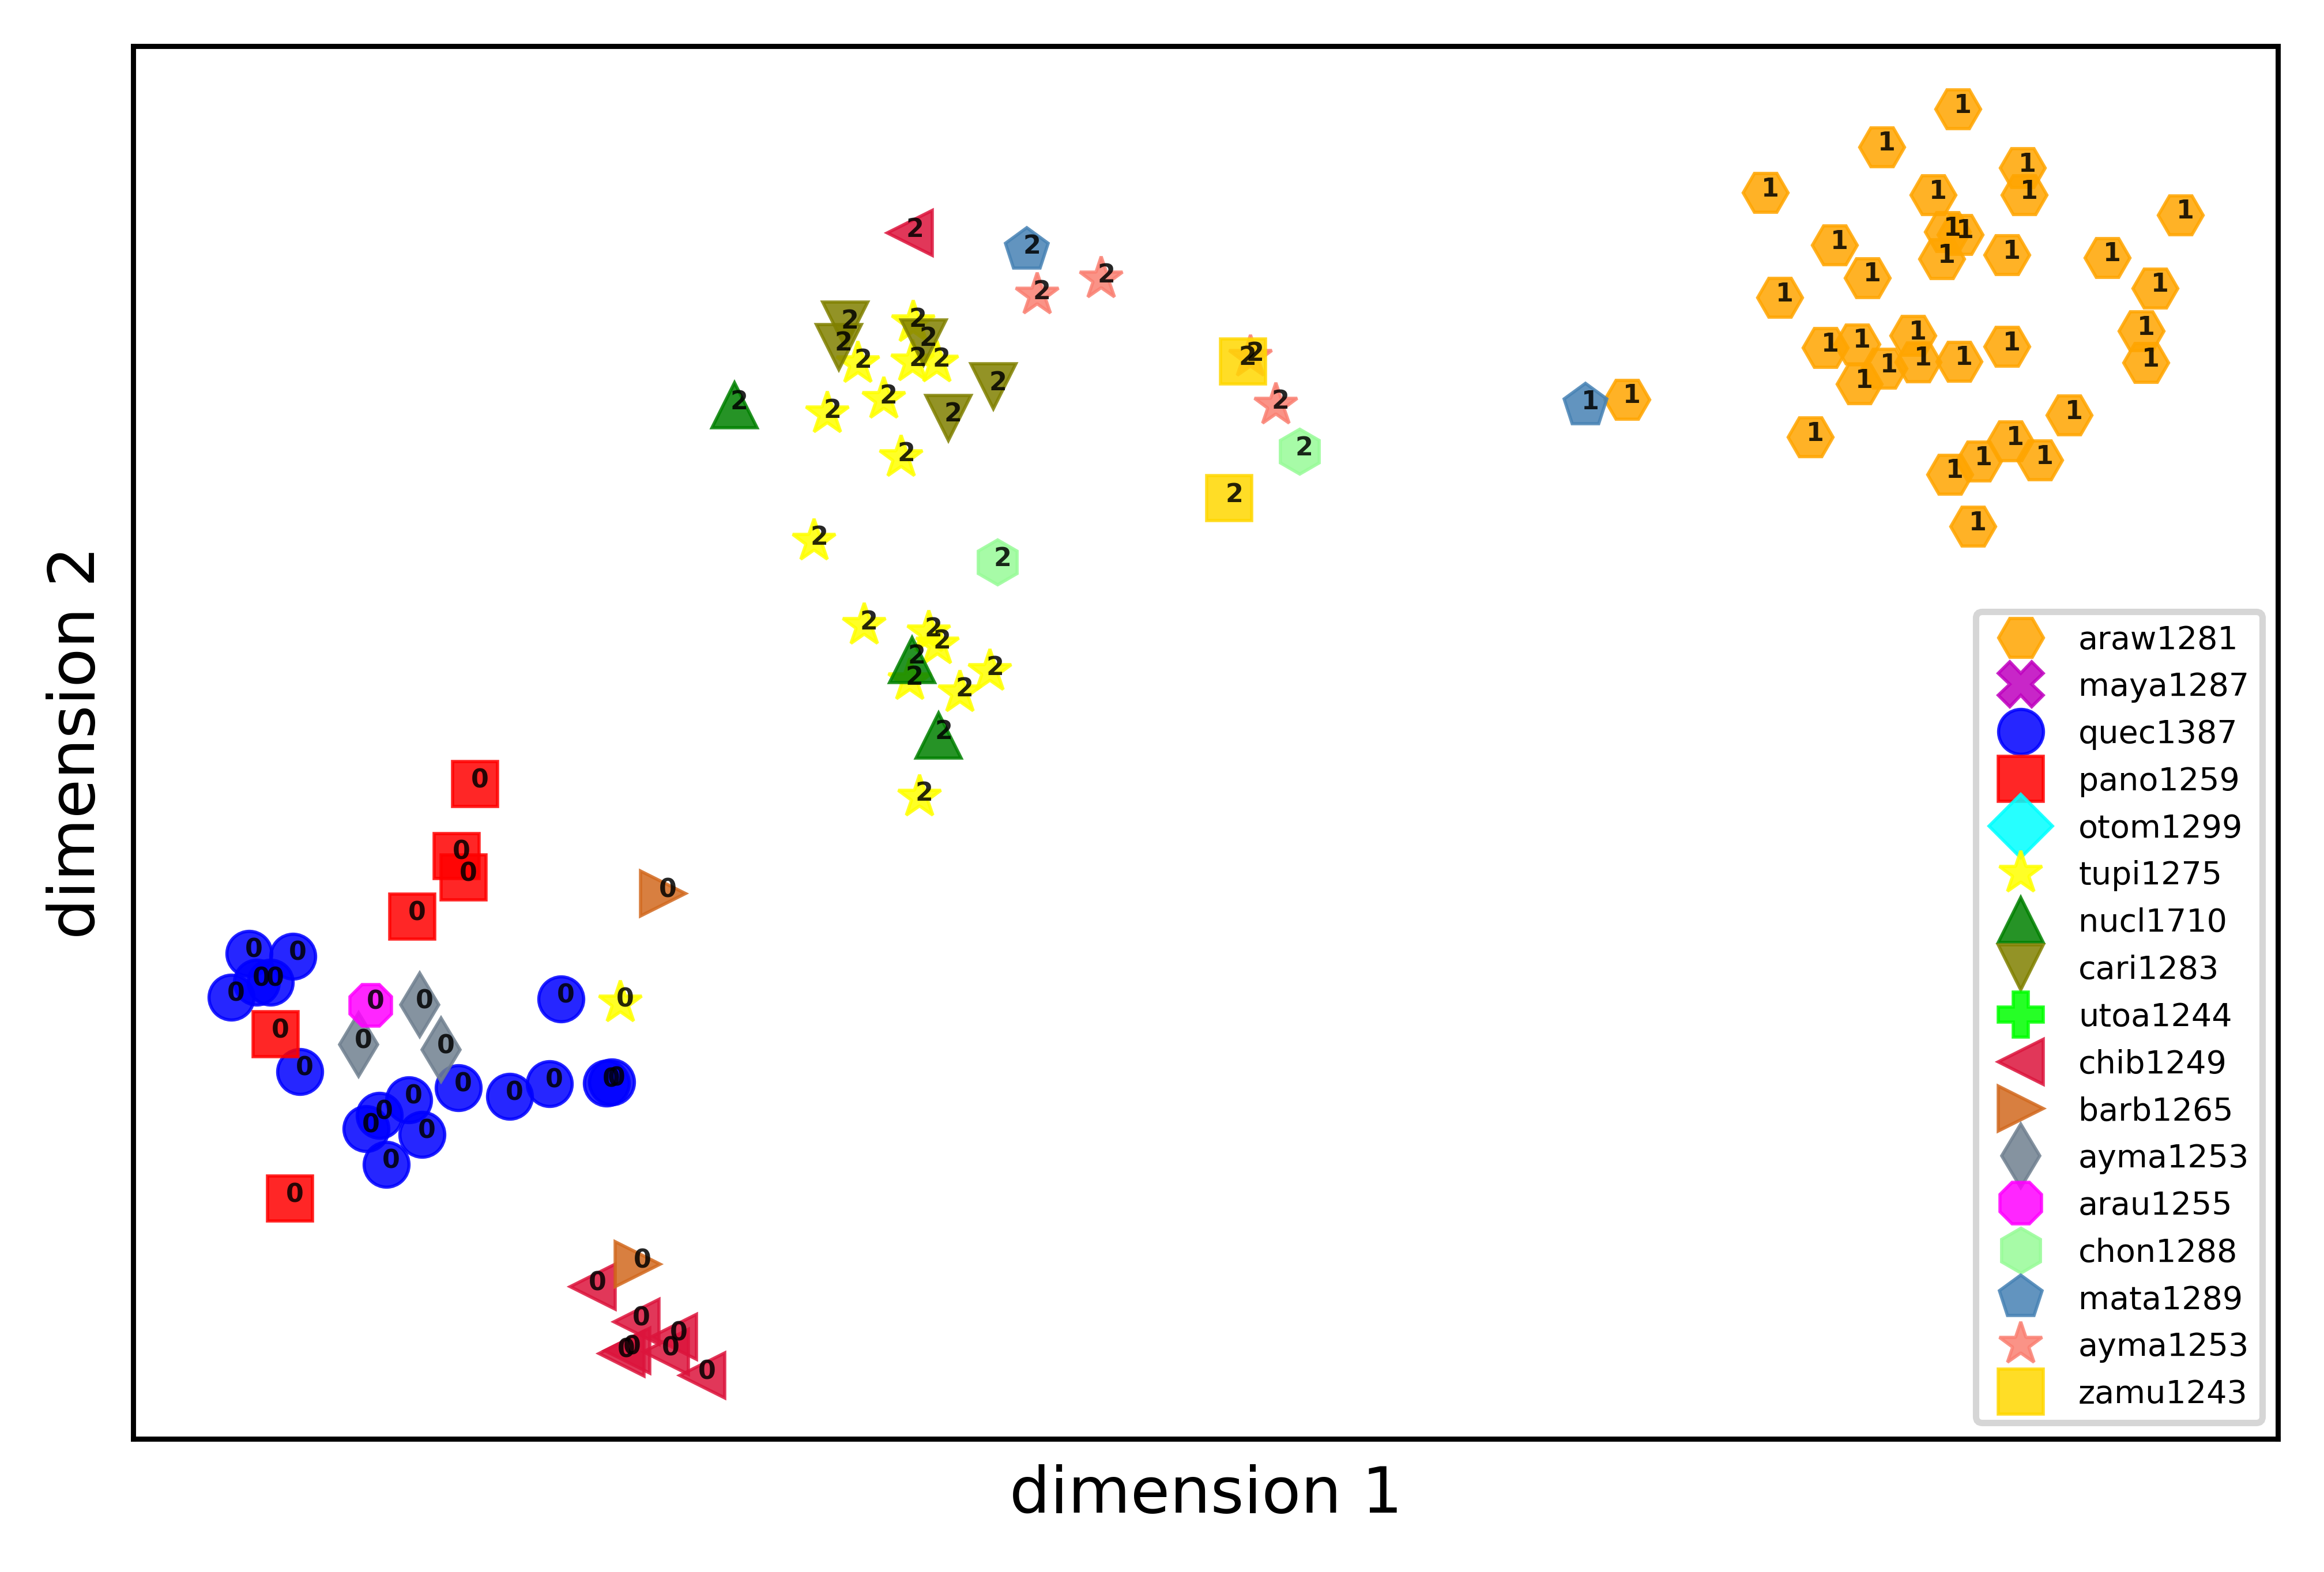

In [79]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')
F = ['zamu1243','guai1249','mata1289','chon1288','arau1255','araw1281','maya1287','quec1387','pano1259','otom1299','tupi1275','nucl1710','cari1283','utoa1244','chib1249','barb1265','ayma1253','arau1255']

fig, ax = plt.subplots(dpi=800)
for i in range(len(x)):
    if i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in F]:
        #ax.annotate(labels[i], weight='demi', color='k', xy=(x[i]-0.4,y[i]-0.4), fontsize=4, alpha=0.85)
        ax.annotate(labels[i], weight='demi', color='k', xy=(x[i]-0.05,y[i]-0.05), fontsize=4, alpha=0.85)

#ax.plot([x[i] for i in [list(languages.keys()).index(language) for language in L.keys() if family[language] in ['Quechuan','Panoan']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Quechuan','Panoan']]],'o',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Quechua+Pano')
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['araw1281']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['araw1281']]],'H',color='orange',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='araw1281')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['maya1287']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['maya1287']]],'X',color='m',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='maya1287')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['quec1387']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['quec1387']]],'o',color='b',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='quec1387')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['pano1259']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['pano1259']]],'s',color='r',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='pano1259')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['otom1299']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['otom1299']]],'D',color='cyan',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='otom1299')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['tupi1275']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['tupi1275']]],'*',color='yellow',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='tupi1275')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['nucl1710']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['nucl1710']]],'^',color='green',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='nucl1710')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['cari1283']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['cari1283']]],'v',color='olive',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='cari1283')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['utoa1244']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['utoa1244']]],'P',color='lime',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='utoa1244')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['chib1249']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['chib1249']]],'<',color='crimson',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='chib1249')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['barb1265']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['barb1265']]],'>',color='chocolate',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='barb1265')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['ayma1253']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['ayma1253']]],'d',color='slategrey',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='ayma1253')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['arau1255']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['arau1255']]],'8',color='fuchsia',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='arau1255')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['chon1288']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['chon1288']]],'h',color='palegreen',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='chon1288')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['mata1289']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['mata1289']]],'p',color='steelblue',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='mata1289')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['guai1249']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['guai1249']]],'*',color='salmon',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='ayma1253')
ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['zamu1243']]],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and id_family[language] in ['zamu1243']]],'s',color='gold',markersize=7,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='zamu1243')
        
#ax.plot([x[i] for i in [list(languages.keys()).index(language) for language in languages.keys() if language in id_family.keys() and id_family[language] in ['maya1287']]],[y[i] for i in [list(languages.keys()).index(language) for language in languages.keys() if language in id_family.keys() and id_family[language] in ['maya1287']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=maya)
#ax.plot([x[i] for i in [list(languages.keys()).index(language) for language in languages.keys() if language in id_family.keys() and id_family[language] in ['otom1299']]],[y[i] for i in [list(languages.keys()).index(language) for language in languages.keys() if language in id_family.keys() and id_family[language] in ['otom1299']]],'o',color='b',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Otomangue')
#ax.plot([x[i] for i in [list(languages.keys()).index(language) for language in languages.keys() if language in id_family.keys() and id_family[language] in ['chib1249']]],[y[i] for i in [list(languages.keys()).index(language) for language in languages.keys() if language in id_family.keys() and id_family[language] in ['chib1249']]],'s',color='r',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Chibcha')
#ax.plot([x[i] for i in [list(features_pred.keys()).index(language) for language in features_pred.keys() if language in id_family.keys() and id_family[language] not in ['araw1281','maya1287','quec1387','pano1259','otom1299','tupi1275','nucl1710','cari1283','utoa1244']]],[y[i] for i in [list(features_pred.keys()).index(language) for language in features_pred.keys() if language in id_family.keys() and id_family[language] not in ['araw1281','maya1287','quec1387','pano1259','otom1299','tupi1275','nucl1710','cari1283','utoa1244']]],'o',color='k',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='none',clip_on=True,label='Other')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean','Arawakan']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean','Arawakan']]],'*',color='gray',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Otras') 
    
plt.grid(False)
#plt.title(str(len(languages))+' languages with '+str(len(keys_comunes))+' features',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
plt.legend(loc='best',fontsize=5)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('GRAPHS/TSNE_sails.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [82]:
## visualicemos los grafos!

import matplotlib.pyplot as plt

def plotG(num_rasgos,knn,labels):
    fig, ax = plt.subplots(dpi=1080)
    G=graphs[num_rasgos][knn]
    
    partition = community_louvain.best_partition(G,weight='none',partition={key:id_family[key] for key in G.nodes()})

    pos = nx.nx_pydot.graphviz_layout(G)#nx.kamada_kawai_layout(G)
    ## 
    nodesA = [node for node in G.nodes() if id_family[node]=='araw1281']
    nodesM = [node for node in G.nodes() if id_family[node]=='maya1287']
    nodesQ = [node for node in G.nodes() if id_family[node]=='quec1387']
    nodesP = [node for node in G.nodes() if id_family[node]=='pano1259']
    nodesO = [node for node in G.nodes() if id_family[node]=='otom1299']
    nodesT = [node for node in G.nodes() if id_family[node]=='tupi1275']
    nodesN = [node for node in G.nodes() if id_family[node]=='nucl1710']
    nodesC = [node for node in G.nodes() if id_family[node]=='cari1283']
    nodesU = [node for node in G.nodes() if id_family[node]=='utoa1244']
    nodesCh= [node for node in G.nodes() if id_family[node]=='chib1249']
    nodesB= [node for node in G.nodes() if id_family[node]=='barb1265']
    nodesAy= [node for node in G.nodes() if id_family[node]=='ayma1253']
    nodesAr= [node for node in G.nodes() if id_family[node]=='arau1255']
    nodesCho= [node for node in G.nodes() if id_family[node]=='chon1288']
    nodesMa= [node for node in G.nodes() if id_family[node]=='mata1289']
    nodesGu= [node for node in G.nodes() if id_family[node]=='guai1249']
    nodesZa= [node for node in G.nodes() if id_family[node]=='zamu1243']

    #nodesnonA = [node for node in G.nodes() if id_family[node] not in ['araw1281','maya1287','quec1387','pano1259','otom1299','tupi1275','nucl1710','cari1283','utoa1244']]
    
    nx.draw_networkx_nodes(G, pos, nodelist=nodesA, node_size = 40, node_color='orange',node_shape='H',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='araw1281') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesM, node_size = 40, node_color='m',node_shape='X', markeredgecolor='k',alpha=0.95,fillstyle='full',linewidths=0.1,label='maya1287') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesQ, node_size = 40, node_color='b',node_shape='o',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='quec1387') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesP, node_size = 40, node_color='r',node_shape='s',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='pano1259') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesO, node_size = 40, node_color='cyan',node_shape='D',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='otom1299') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesT, node_size = 40, node_color='yellow',node_shape='*',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='tupi1275') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesN, node_size = 40, node_color='green',node_shape='^',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='nucl1710') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesC, node_size = 40, node_color='olive',node_shape='v',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='cari1283') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesU, node_size = 40, node_color='lime',node_shape='p',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='utoa1244') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesCh, node_size = 40, node_color='crimson',node_shape='<',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='chib1249') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesB, node_size = 40, node_color='chocolate',node_shape='>',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='barb1265') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesAy, node_size = 40, node_color='slategrey',node_shape='d',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='ayma1253') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesAr, node_size = 40, node_color='fuchsia',node_shape='8',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='arau1255') 
    ##
    nx.draw_networkx_nodes(G, pos, nodelist=nodesCho, node_size = 40, node_color='palegreen',node_shape='h',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='chon1288') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesMa, node_size = 40, node_color='steelblue',node_shape='p',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='mata1289') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesGu, node_size = 40, node_color='salmon',node_shape='*',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='guai1249') 
    nx.draw_networkx_nodes(G, pos, nodelist=nodesZa, node_size = 40, node_color='gold',node_shape='s',markeredgecolor='k',alpha=0.95,fillstyle='full', linewidths=0.1,label='zamu1243') 
    labels={node:label for node,label in zip(G.nodes(),labels)}
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.15,edge_color='lightblue')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=4,font_color='k',font_family='monospace')
    plt.title(str(num_rasgos)+' features'+', '+str(len(G))+' languages and '+str(knn)+' nearest neighbors',fontsize=10)
    plt.legend(loc='best',fontsize=5)
    plt.axis('off')
    plt.savefig('GRAPHS/graph_knn_'+str(num_rasgos)+'_'+str(knn)+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

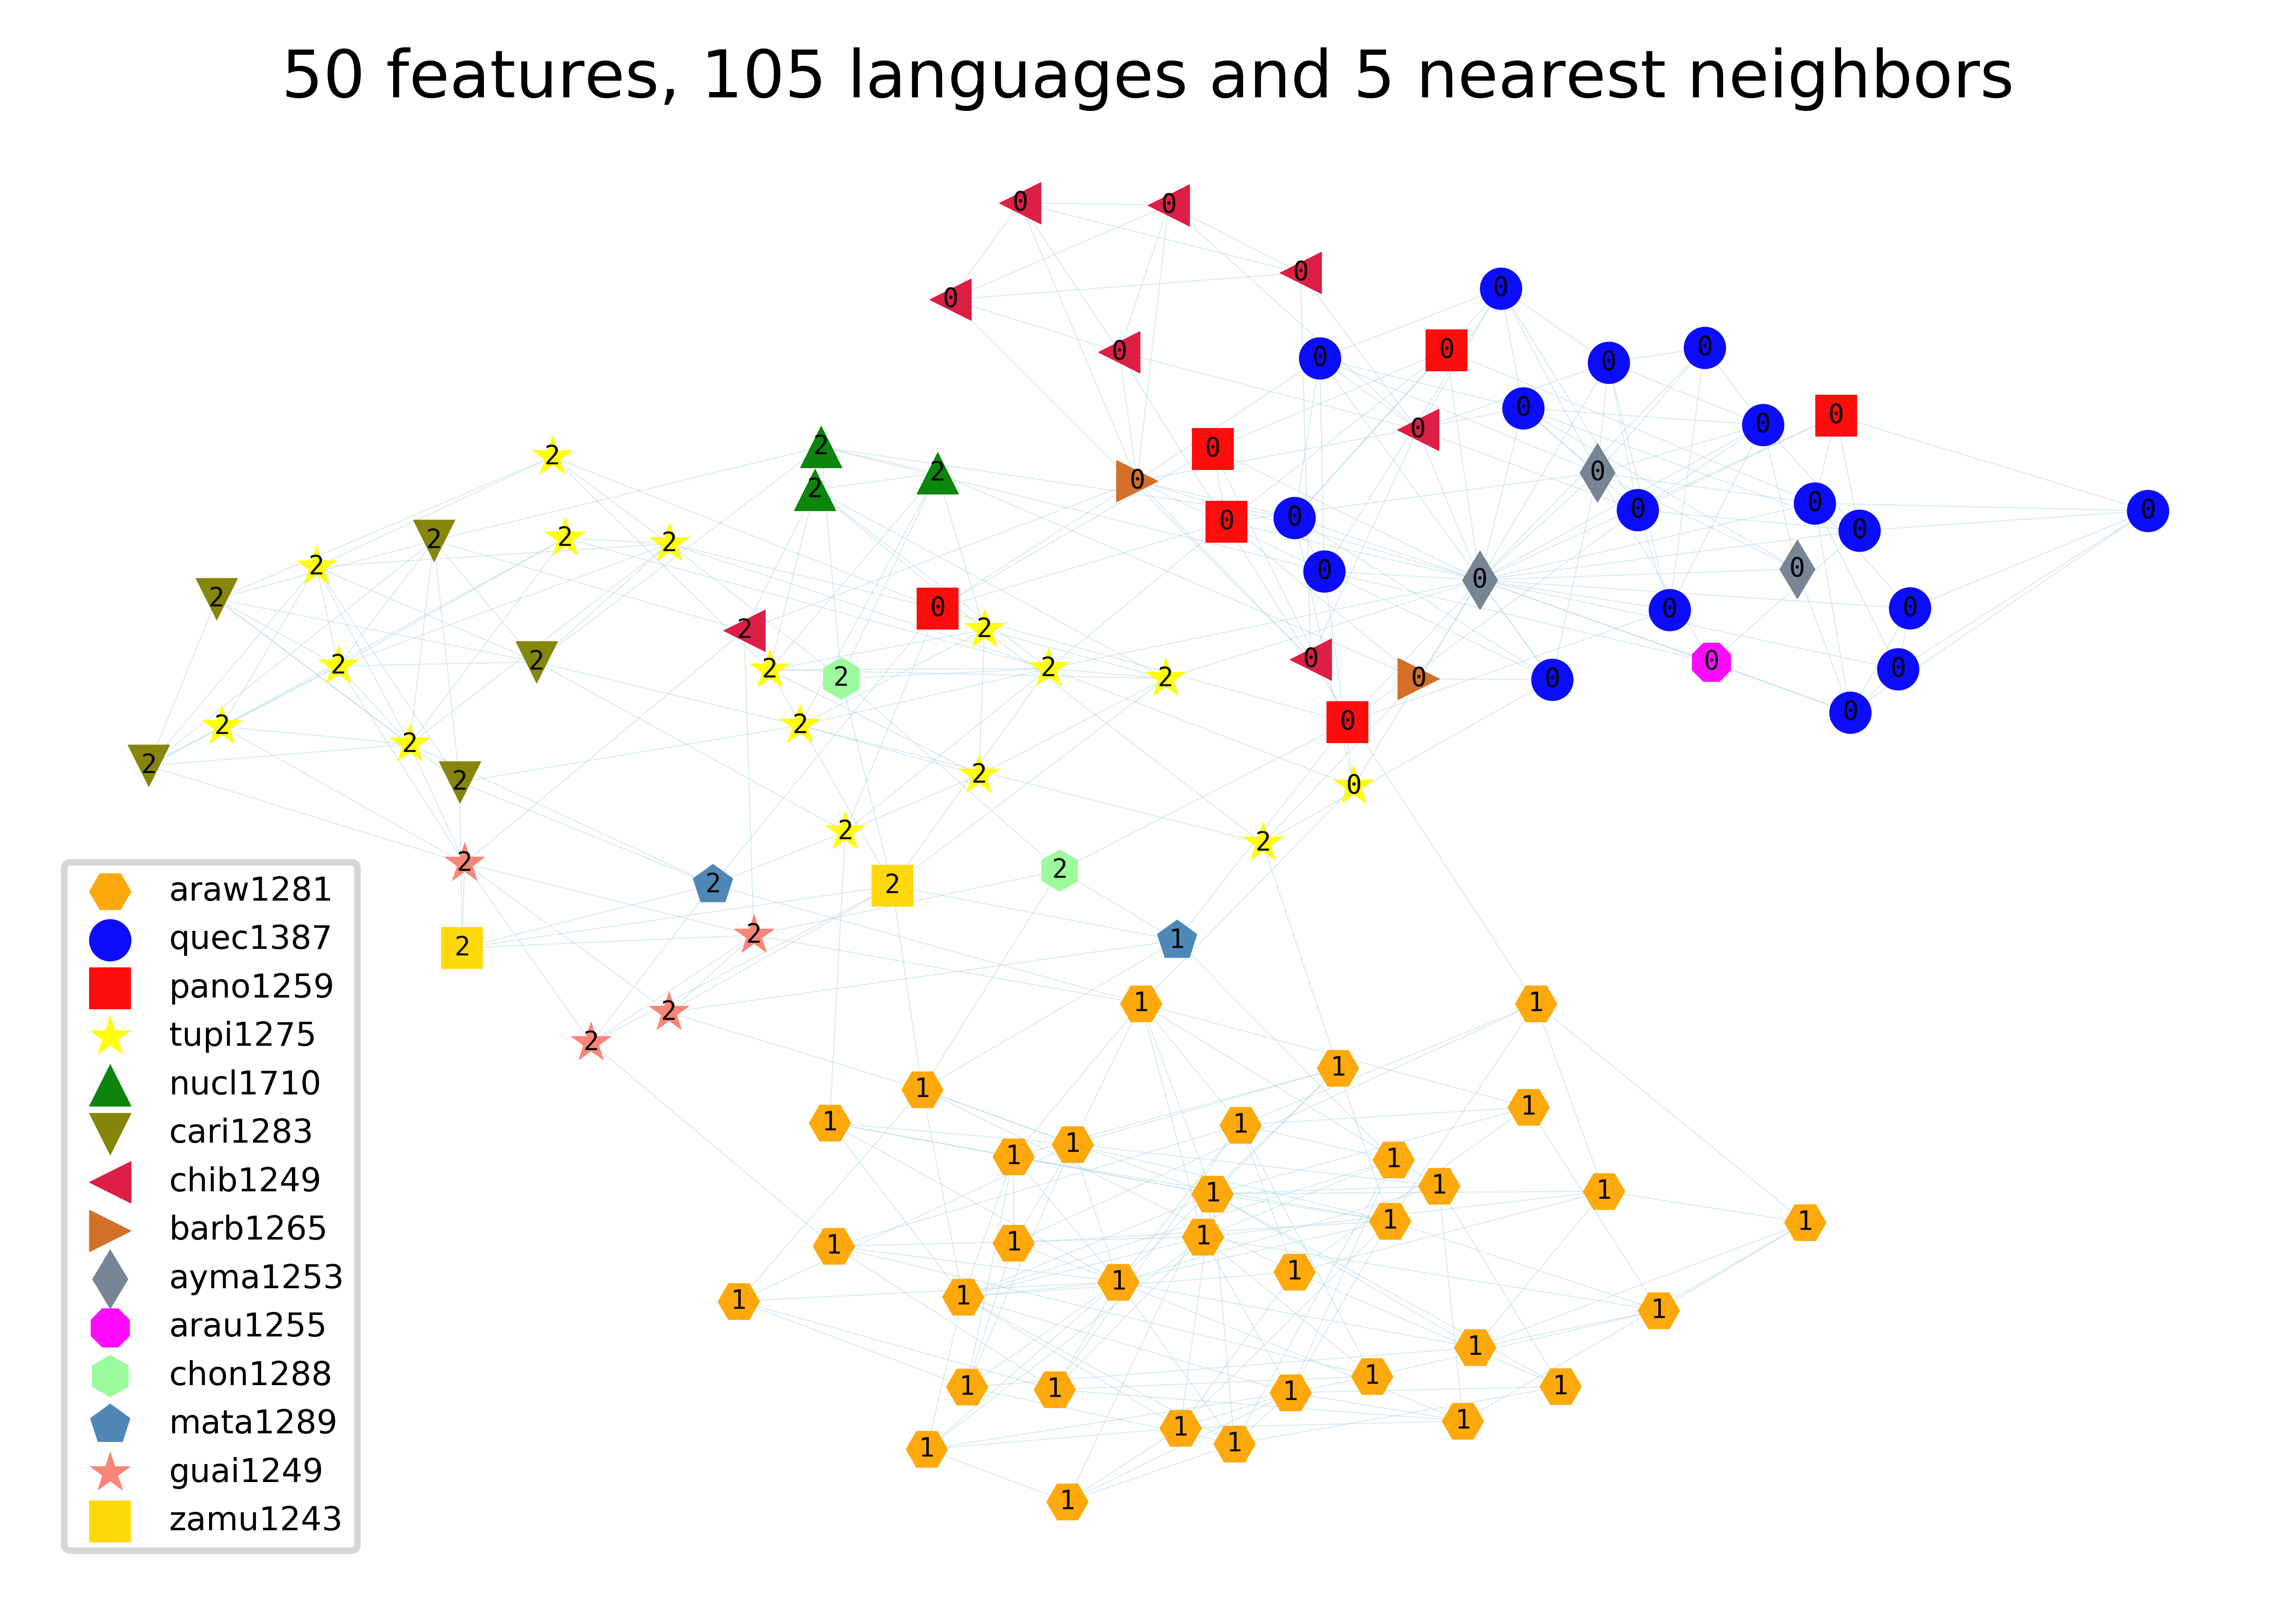

In [83]:
plotG(50,5,labels)

### 3. Algunas ideas sobre **modularidad**
xxx